In [12]:
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\keipj\AppData\Local\Temp\ipykernel_5020\1265735315.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(data_path, index_col=1, parse_dates=True)


,y,number_of_beds,markaze_behdasht,number_of_labs,number_of_active_beds,number_of_employees,number_of_doctors,number_of_pir_doctors,number_of_stuff,number_of_persons_in_hotels,...,number_of_person_bus_inside,number_of_person_bus_outside,number_of_person_minibus_inside,number_of_person_minibus_outside,number_of_person_car_inside,number_of_person_car_outside,covid,month,season,y_last
Date,,,,,,,,,,,,,,,,,,,,,
1394-01,1.325505,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352,618303,12874,9411,755,2500,0.0,1,1,2615.442105
1394-02,1.433413,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352,618303,12874,9411,755,2500,0.0,2,1,1664.000000
1394-03,1.480678,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352,618303,12874,9411,755,2500,0.0,3,1,2027.000000
1394-04,1.365933,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352,618303,12874,9411,755,2500,0.0,4,2,2186.000000
1394-05,1.489596,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,7209.152941,...,155352,618303,12874,9411,755,2500,0.0,5,2,1800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401-08,1.895363,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,9200.000000,...,208977,822597,13863,6923,2227,4639,0.0,8,3,3162.000000
1401-09,1.892093,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,9225.000000,...,208977,822597,13863,6923,2227,4639,0.0,9,3,3581.000000
1401-10,1.737218,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,9225.000000,...,208977,822597,13863,6923,2227,4639,0.0,10,4,3570.000000


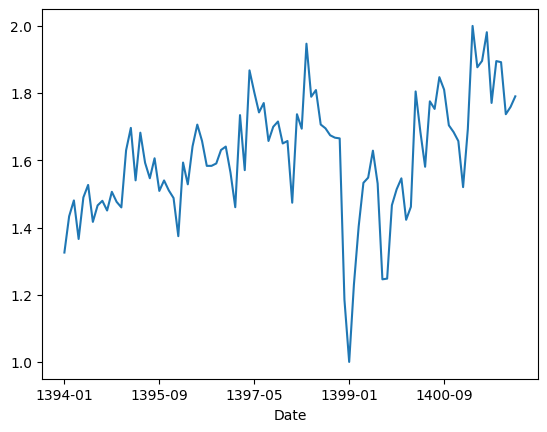

In [1]:
import pandas as pd
from persiantools.jdatetime import JalaliDate
from sklearn.preprocessing import MinMaxScaler

# Define the data path
data_path = "data/data_complete.csv"

# Read the CSV file with the custom date parser
data = pd.read_csv(data_path, index_col=1, parse_dates=True)
data = data.iloc[:, 1:]

scaler_x = MinMaxScaler(feature_range=(1, 2))
scaler_y = MinMaxScaler(feature_range=(1, 2))
scaled_data = scaler_x.fit_transform(data.iloc[:, 0].values.reshape(-1, 1))
data["y"] = scaled_data 
data["y"].plot()
data

c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\All Python Projects\Interpreters\in_Machine_Learning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the n

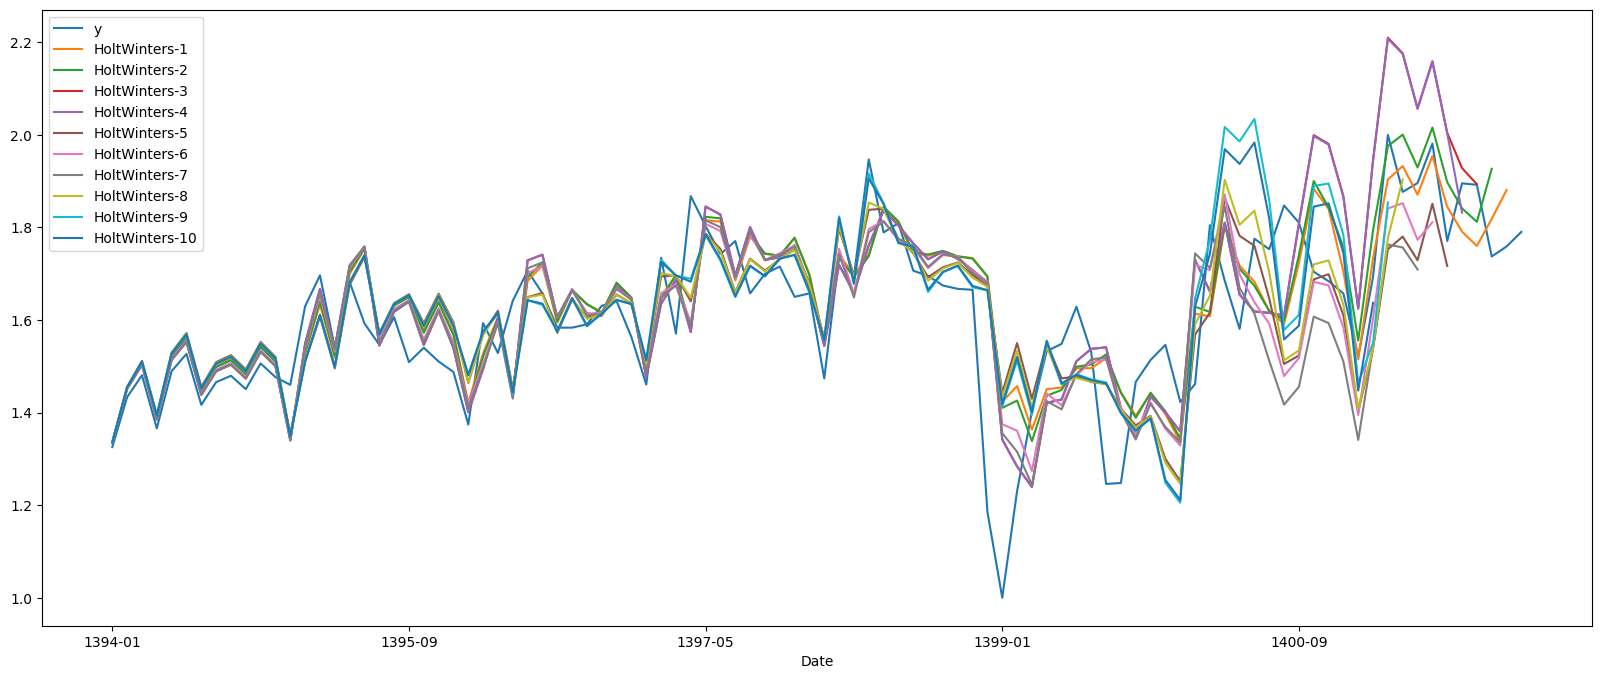

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

N_test = 12
i = 1
train_idx = []
test_idx = []
for i in range(10, 0, -1):
    data_n = data.copy().iloc[:-i, :]
    train = data_n[:-N_test]
    test = data_n[-N_test:]
    train_idx.append(data.index <= train.index[-1])
    test_idx.append(data.index > train.index[-1])
    test_idx[10-i][-i:] = False
    train.index.freq = "MS"
    holtwinters = ExponentialSmoothing(train["y"],
                                        initialization_method="legacy-heuristic",
                                        trend="add", seasonal="mul", 
                                        seasonal_periods=12, use_boxcox=True)
    holtwinters_model = holtwinters.fit()

    data.loc[train_idx[10-i], f"HoltWinters-{i}"] = holtwinters_model.fittedvalues
    data.loc[test_idx[10-i], f"HoltWinters-{i}"] = holtwinters_model.forecast(N_test).to_numpy()

data[["y", "HoltWinters-1", "HoltWinters-2", "HoltWinters-3", "HoltWinters-4", "HoltWinters-5", "HoltWinters-6", "HoltWinters-7", "HoltWinters-8", "HoltWinters-9", "HoltWinters-10"]].plot(figsize=(20, 8));

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
for i in range(10, 0, -1):
    error_train_mse = mean_squared_error(data[train_idx[10-i]]["y"], data[train_idx[10-i]][f"HoltWinters-{i}"])
    error_test_mse = mean_squared_error(data[test_idx[10-i]]["y"], data[test_idx[10-i]][f"HoltWinters-{i}"])
    error_train_r2 = r2_score(data[train_idx[10-i]]["y"], data[train_idx[10-i]][f"HoltWinters-{i}"])
    error_test_r2 = r2_score(data[test_idx[10-i]]["y"], data[test_idx[10-i]][f"HoltWinters-{i}"])
    print(f"train for {i if len(str(i)) == 2 else '0'+str(i)} is: {error_train_mse:.4f}, {error_train_r2:.2f} and test is: {error_test_mse:.4f}, {error_test_r2:.2f}")


train for 10 is: 0.0147, 0.43 and test is: 0.0381, -3.51
train for 09 is: 0.0145, 0.44 and test is: 0.0504, -2.49
train for 08 is: 0.0152, 0.41 and test is: 0.0279, -0.75
train for 07 is: 0.0143, 0.44 and test is: 0.0496, -2.29
train for 06 is: 0.0144, 0.44 and test is: 0.0289, -0.56
train for 05 is: 0.0154, 0.40 and test is: 0.0299, -0.62
train for 04 is: 0.0149, 0.44 and test is: 0.0448, -1.34
train for 03 is: 0.0147, 0.45 and test is: 0.0451, -1.26
train for 02 is: 0.0158, 0.41 and test is: 0.0105, 0.46
train for 01 is: 0.0161, 0.39 and test is: 0.0061, 0.67


In [15]:
holtwinters_model.params


{'smoothing_level': 0.36992166194695825,
 'smoothing_trend': 0.001973401722837953,
 'smoothing_seasonal': 0.25881219933579064,
 'damping_trend': nan,
 'initial_level': 0.5082873144926813,
 'initial_trend': 0.02003377111722307,
 'initial_seasons': array([0.83794153, 1.21135833, 1.39135113, 0.97185796, 1.42646712,
        1.57679378, 1.15038675, 1.33364387, 1.38669692, 1.27583066,
        1.49301031, 1.37509008]),
 'use_boxcox': True,
 'lamda': 2.7544060762531832,
 'remove_bias': False}